[예제] 파이썬의 데이타 주무르기


## 네이버 영화 사이트 : http://www.naver.com

      왼쪽메뉴 '영화랭킹' > '평점순(현재상영영화) 탭
      
      https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&date=20190301

In [1]:
import pandas as pd
from bs4 import BeautifulSoup
from urllib import request as req

url = 'https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&date=20190301'
res = req.urlopen(url)
soup =  BeautifulSoup(res, 'html.parser')

In [2]:
# 페이지에서 제목과 평점을 추출
soup.find_all('div','tit5')
soup.find_all('div','tit5')[0].a.string

soup.find_all('td','point')
soup.find_all('td','point')[0].string


'9.63'

In [3]:
# 전체 갯수를 얻어오기
# 앞의 숫자가 이미지파일이기에 포인트변수의 갯수로 영화수를 얻어온다
su = len(soup.find_all('td','point'))
su

# 제목과 평점을 우선 변수에 저장
movie_name = []
movie_point = []

movie_name.extend([soup.find_all('div','tit5')[n].a.string for n in range(0, su)])
movie_name

movie_point.extend([soup.find_all('td','point')[n].string for n in range(0, su)])
movie_point

['9.63',
 '9.60',
 '9.43',
 '9.41',
 '9.40',
 '9.36',
 '9.27',
 '9.23',
 '9.21',
 '9.19',
 '9.18',
 '9.15',
 '9.10',
 '9.09',
 '9.08',
 '9.06',
 '8.89',
 '8.84',
 '8.84',
 '8.80',
 '8.78',
 '8.78',
 '8.78',
 '8.72',
 '8.72',
 '8.66',
 '8.61',
 '8.43',
 '8.41',
 '8.32',
 '7.88',
 '7.80',
 '7.50',
 '7.22',
 '7.10',
 '6.98',
 '6.40',
 '6.31',
 '6.12',
 '5.87',
 '5.68',
 '4.16']

* append와 extend 차이

    + append()는 object를 맨 뒤에 추가합니다.

    x = [1, 2, 3]
    x.append([4, 5])
    print (x)
    [1, 2, 3, [4, 5]]

    + extend()는 iterable 객체(리스트, 튜플, 딕셔너리 등)의 엘레멘트를 list에 appending시킵니다.

    x = [1, 2, 3]
    x.extend([4, 5])
    print (x)
    [1, 2, 3, 4, 5]

In [4]:
# 데이타프레임 형식으로 만들기
movie = pd.DataFrame({'name': movie_name, 'point':movie_point})
movie.head()

# 오늘날짜로 date 컬럼 추가
import datetime
datetime.date.today()

movie['date']=datetime.date.today()
movie.head()

,name,point,date
0,그린 북,9.63,2021-06-29
1,가버나움,9.60,2021-06-29
2,보헤미안 랩소디,9.43,2021-06-29
3,언더독,9.41,2021-06-29
4,폴란드로 간 아이들,9.40,2021-06-29


In [5]:
# 날짜 계산하기

today = datetime.date.today()
print(today)
theday = today + datetime.timedelta(-10)
print(theday)

dt_index = pd.date_range(start='2022-09-01', end='2022-10-31')
print(dt_index)

2021-06-29
2021-06-19
DatetimeIndex(['2022-09-01', '2022-09-02', '2022-09-03', '2022-09-04',
               '2022-09-05', '2022-09-06', '2022-09-07', '2022-09-08',
               '2022-09-09', '2022-09-10', '2022-09-11', '2022-09-12',
               '2022-09-13', '2022-09-14', '2022-09-15', '2022-09-16',
               '2022-09-17', '2022-09-18', '2022-09-19', '2022-09-20',
               '2022-09-21', '2022-09-22', '2022-09-23', '2022-09-24',
               '2022-09-25', '2022-09-26', '2022-09-27', '2022-09-28',
               '2022-09-29', '2022-09-30', '2022-10-01', '2022-10-02',
               '2022-10-03', '2022-10-04', '2022-10-05', '2022-10-06',
               '2022-10-07', '2022-10-08', '2022-10-09', '2022-10-10',
               '2022-10-11', '2022-10-12', '2022-10-13', '2022-10-14',
               '2022-10-15', '2022-10-16', '2022-10-17', '2022-10-18',
               '2022-10-19', '2022-10-20', '2022-10-21', '2022-10-22',
               '2022-10-23', '2022-10-24', '2022-10-25'

### 10일 동안의 영화 평점 데이타 얻어오기



In [6]:
# (1) 10일전부터 오늘날짜까지의 날짜를 구하기
today = datetime.date.today()
theday = today + datetime.timedelta(-10)
m_date = pd.date_range(start=theday, end=today)
m_date



DatetimeIndex(['2021-06-19', '2021-06-20', '2021-06-21', '2021-06-22',
               '2021-06-23', '2021-06-24', '2021-06-25', '2021-06-26',
               '2021-06-27', '2021-06-28', '2021-06-29'],
              dtype='datetime64[ns]', freq='D')

In [7]:
# (2) 날짜를 변경하면서 다시 웹에서 데이타를 가져와서 변수에 지정
movie_date=[]
movie_name=[]
movie_point=[]

for day in m_date:
    # print(day)
    # print(day.strftime("%Y%m%d"))
    url = 'https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&date={day}'
    res = req.urlopen( url.format(day=day.strftime("%Y%m%d")))
    soup =  BeautifulSoup(res, 'html.parser')
    
    su = len(soup.find_all('td','point'))
    
    movie_name.extend([soup.find_all('div','tit5')[n].a.string for n in range(0, su)])
    movie_point.extend([soup.find_all('td','point')[n].string for n in range(0, su)])
    movie_date.extend([day for n in range(0,su)])


In [74]:
len( movie_name )
len( movie_point )
len( movie_date )

460

In [76]:
# (3) 생성한 리스트변수들을 데이타프레임으로 생성
movie = pd.DataFrame({'date': movie_date, 'name': movie_name, 'point':movie_point})
movie.head()
movie.info()
movie.tail()

,date,name,point
0,2019-02-20,그린 북,9.65
1,2019-02-20,가버나움,9.58
2,2019-02-20,보헤미안 랩소디,9.43
3,2019-02-20,언더독,9.43
4,2019-02-20,폴란드로 간 아이들,9.40


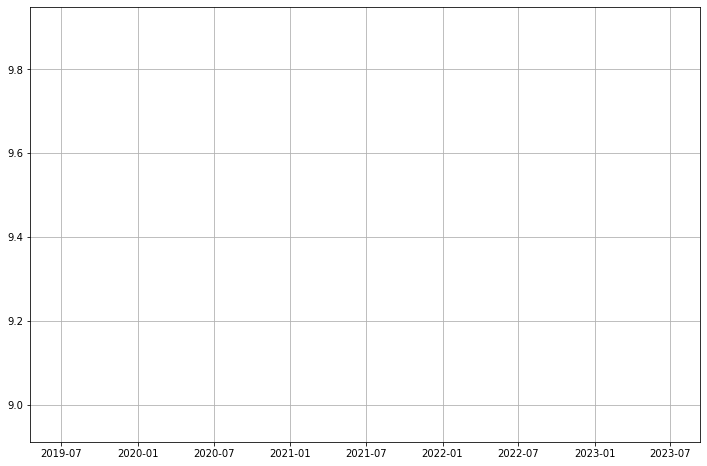

In [9]:
# (4) 영화하나를 선택하여 날짜별 평점을 그래프로
temp = movie.query('name==["보헤미안 랩소디"]')
temp.head()


%matplotlib inline
import matplotlib.pyplot as plt


plt.figure(figsize=(12,8))
plt.plot(temp['date'], temp['point'])
plt.grid()

In [8]:
# 영화별 평점 합산한다면 - pivot_table
import numpy as np
bymovies = pd.pivot_table( movie, index=['name'], aggfunc=np.sum )
bymovies.head()

# 포인트가 숫자값이 아닌 문자열값이였다
# 데이타 타입을 변경
movie['point'] = movie['point'].astype(float)

# 다시 피봇테이블 확인
bymovies = pd.pivot_table( movie, index=['name'], aggfunc=np.sum )
bymovies.head()

# 평점순으로 확인
bymovies.sort_values(by='point', ascending=False).head()

,point
name,
그린 북,9.63
가버나움,9.60
보헤미안 랩소디,9.43
언더독,9.41
폴란드로 간 아이들,9.40
